<a href="https://colab.research.google.com/github/NikolaiTeslovich/sSNOM/blob/master/sSNOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import necessary Python packages
import os
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# print message after packages imported successfully
print("import of packages successful")


import of packages successful


In [0]:
#check working directory directory
os.getcwd()

'/content'

In [0]:
#load the text file
A = np.loadtxt(fname = "/content/M0A.txt")
#load a second text file
B = np.loadtxt(fname = "/content/R-M0A.txt")

In [0]:
#reverse each line of the array R-MOA
np.fliplr(B)

array([[156.9828949 , 156.98199463, 156.984375  , ..., 157.19381714,
        157.07228088, 156.99557495],
       [157.19836426, 157.20178223, 157.17692566, ..., 157.22166443,
        157.20944214, 157.01086426],
       [157.22401428, 157.22120667, 157.2170105 , ..., 157.24023438,
        157.24275208, 157.2121582 ],
       ...,
       [158.47480774, 158.47570801, 158.47434998, ..., 158.29196167,
        158.30410767, 158.49917603],
       [158.34545898, 158.29141235, 158.28903198, ..., 158.51589966,
        158.51693726, 158.30532837],
       [158.50994873, 158.51208496, 158.51820374, ..., 158.5422821 ,
        158.54006958, 158.34240723]])

In [0]:
C = A - B

In [0]:
C = np.array(C)
C

array([[ 0.1897583 ,  0.10102844, -0.02185059, ...,  0.19680786,
         0.19607544,  0.20048523],
       [ 0.01747131, -0.17991638, -0.19192505, ..., -0.14826965,
        -0.18244934, -0.18002319],
       [-0.19082642, -0.19854736, -0.2116394 , ..., -0.1811676 ,
        -0.18025208, -0.1934967 ],
       ...,
       [-0.22175598, -0.02478027, -0.01542664, ..., -0.20613098,
        -0.20765686, -0.18841553],
       [ 0.19429016, -0.02183533, -0.02947998, ...,  0.18249512,
         0.18359375,  0.14096069],
       [-0.01571655, -0.21026611, -0.22119141, ..., -0.19273376,
        -0.17889404, -0.20617676]])

In [0]:
C_flat = C.flatten()
C_flat

array([ 0.1897583 ,  0.10102844, -0.02185059, ..., -0.19273376,
       -0.17889404, -0.20617676])

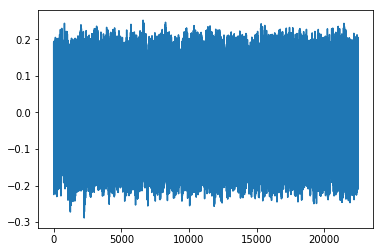

In [0]:
plt.plot(C_flat)
plt.show()

In [0]:
C_FFT = np.fft.fft(C_flat)
C_FFT

array([-94.42289734 +0.j        ,  -7.72670415 -7.36143935j,
       -11.35563105-17.86194415j, ..., -32.73262691 -5.27322582j,
       -11.35563105+17.86194415j,  -7.72670415 +7.36143935j])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


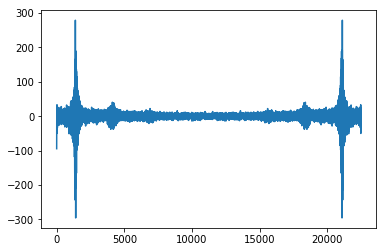

In [0]:
plt.plot(C_FFT)
plt.show()

In [0]:
print(type(C_FFT))

<class 'numpy.ndarray'>


In [0]:
C_FFT.shape

(22500,)

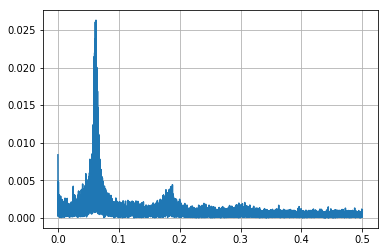

In [0]:

# Number of sample points
N = 22500
# sample spacing
T = 1.0
x = np.linspace(0.0, N*T, N)
yf = C_FFT
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

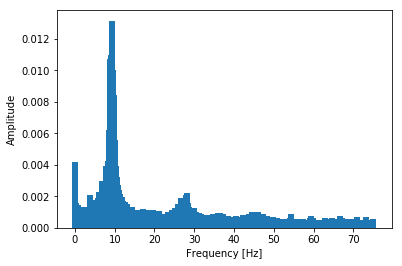

In [0]:
T = t[1] - t[0]  # sampling interval 
N = C_FFT.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(C_FFT)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()